In [36]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
#from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import svm,datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df_train = pd.read_csv("data/training_data.csv")
training_data_bkp = pd.read_csv("data/training_data.csv")
df_test = pd.read_csv("data/test_data.csv")
testing_data_bkp = pd.read_csv("data/test_data.csv")

df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

In [3]:
df_train = df_train.dropna(axis=1)
df_test = df_test.dropna(axis=1)
df_train.shape

(4930, 133)

In [4]:
df_test.shape

(43, 133)

In [5]:
training_data_bkp.shape

(4930, 133)

In [6]:
list(df_train.columns)

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


In [7]:
features = ['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain','stomach_pain',
            'acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
            'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy',
            'patches_in_throat','irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating',
            'dehydration','indigestion','headache','yellowish_skin','dark_urine','nausea','loss_of_appetite',
            'pain_behind_the_eyes','back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
            'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach','swelled_lymph_nodes','malaise',
            'blurred_and_distorted_vision','phlegm','throat_irritation','redness_of_eyes','sinus_pressure','runny_nose',
            'congestion','chest_pain','weakness_in_limbs','fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region',
            'bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
            'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails','swollen_extremeties',
            'excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain',
            'hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements',
            'loss_of_balance','unsteadiness','weakness_of_one_body_side','loss_of_smell','bladder_discomfort',
            'foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
            'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
            'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history',
            'mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
            'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
            'fluid_overload.1','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking',
            'pus_filled_pimples','blackheads','scurring','skin_peeling','silver_like_dusting','small_dents_in_nails',
            'inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze',]

X_train = df_train[features]
y_train = df_train.prognosis
X_test = df_test[features]
y_test = df_test.prognosis

DECISION TREE CLASSIFICATION

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:","%.2f"%(metrics.accuracy_score(y_test, y_pred)*100),"%")

Accuracy: 74.42 %


In [9]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)
print("Accuracy of the Model: ","%.2f"%(metrics.accuracy_score(y_test, ypred)*100),"%")

Accuracy of the Model:  97.67 %


In [38]:
filename = "model.pkl"
pickle.dump(rfc, open(filename, "wb"))

In [10]:
labelEncoder = LabelEncoder()
int_labels = list(map(str, labelEncoder.fit_transform(y_train)))

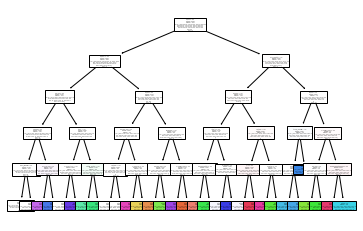

In [11]:
tree.plot_tree(clf,feature_names = features, 
               class_names=int_labels,
               filled = True);

In [17]:
tree.export_graphviz(clf,
                     out_file="output/tree_entropy.dot",
                     feature_names = features, 
                     class_names=labelEncoder.classes_,
                     filled = True)

In [ ]:
'''dot -Tpng -Gdpi=300 tree.dot -o tree.png'''

In [14]:
'''text_representation = tree.export_text(clf)
print(text_representation)'''

'text_representation = tree.export_text(clf)\nprint(text_representation)'

In [18]:
print(df_train.prognosis.unique())
len(df_train['prognosis'].unique())

['Bronchial Asthma' 'Migraine' 'Chronic cholestasis' 'Hypertension '
 'AIDS' 'Varicose veins' 'Paralysis (brain hemorrhage)' 'GERD' 'Acne'
 'Hepatitis C' 'Diabetes ' 'Osteoarthristis'
 'Dimorphic hemmorhoids(piles)' 'Hepatitis E' 'hepatitis A'
 'Hypothyroidism' 'Hypoglycemia' 'Jaundice' 'Arthritis' 'Drug Reaction'
 'Fungal infection' 'Hepatitis D' 'Psoriasis' 'Allergy' 'Impetigo'
 'Cervical spondylosis' 'Common Cold' 'Hepatitis B'
 '(vertigo) Paroymsal  Positional Vertigo' 'Alcoholic hepatitis'
 'Urinary tract infection' 'Hyperthyroidism' 'Gastroenteritis' 'Dengue'
 'Pneumonia' 'Typhoid' 'Tuberculosis' 'Peptic ulcer diseae' 'Chicken pox'
 'Malaria' 'Heart attack' 'No disease']


42

K MEANS

In [19]:
kmeans = KMeans(n_clusters=41, random_state=1) 

kmeans.fit(X_train)

KMeans(n_clusters=41, random_state=1)

In [20]:
kmeans.cluster_centers_

array([[ 2.77555756e-17, -5.55111512e-17,  1.04083409e-17, ...,
        -3.46944695e-18, -3.46944695e-18, -3.46944695e-18],
       [ 0.00000000e+00,  8.76923077e-01,  6.93889390e-18, ...,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18],
       [ 2.77555756e-17, -5.55111512e-17,  1.04083409e-17, ...,
        -3.46944695e-18, -3.46944695e-18, -3.46944695e-18],
       ...,
       [ 2.77555756e-17, -8.32667268e-17,  6.93889390e-18, ...,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18],
       [ 2.77555756e-17, -8.32667268e-17,  1.04083409e-17, ...,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18],
       [ 9.00000000e-01,  9.00000000e-01,  9.00000000e-01, ...,
        -6.93889390e-18, -6.93889390e-18, -6.93889390e-18]])

In [21]:
labels = kmeans.labels_
correct_labels = sum(y_train == labels)

In [22]:
kmeans.inertia_

1778.5615384615446

In [23]:
labels

array([ 2, 11,  3, ..., 17,  8, 36], dtype=int32)

In [24]:
rbf = svm.SVC(kernel='rbf', gamma=0.55, C=0.1).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100),"%")

Accuracy (RBF Kernel):  97.67 %


In [25]:
cm = confusion_matrix(y_test, rbf_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])



NAIVE BAYES

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
gmodel = GaussianNB()
gmodel.fit(X_train,y_train)

GaussianNB()

In [28]:
gpred = gmodel.predict(X_test)
gcm = confusion_matrix(y_test,gpred,labels=['Psoriasis' ,'Typhoid' ,'Hepatitis E', 'Fungal infection', 'GERD', 'Arthritis',
 'Heart attack', 'Cervical spondylosis', 'Hepatitis C', 'Allergy',
 'Drug Reaction', 'Chicken pox', 'Migraine', 'hepatitis A', 'Hypertension ',
 'Dengue', 'Hypothyroidism', 'Pneumonia', 'AIDS', 'Gastroenteritis',
 'Hepatitis D', 'Dimorphic hemmorhoids(piles)', 'Impetigo',
 '(vertigo) Paroymsal  Positional Vertigo', 'Tuberculosis',
 'Peptic ulcer diseae', 'Varicose veins', 'Malaria', 'Hypoglycemia',
 'Common Cold', 'Paralysis (brain hemorrhage)', 'Bronchial Asthma',
 'Hyperthyroidism', 'Hepatitis B', 'Acne', 'Alcoholic hepatitis',
 'Urinary tract infection', 'Osteoarthristis', 'Jaundice', 'Diabetes ',
 'Chronic cholestasis']) #labels will change everytime we execute from start because of randomized rows
print (gcm)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [29]:
accuracy_score(y_test,gpred)

0.9767441860465116

PCA + RANDOM FOREST CLASSIFIER

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
variance = pca.explained_variance_ratio_
variance

array([7.34971232e-02, 6.63989831e-02, 5.20721148e-02, 4.82976576e-02,
       4.32743397e-02, 3.76251661e-02, 3.63819356e-02, 3.53655549e-02,
       3.40031165e-02, 3.30049964e-02, 3.13095197e-02, 3.00714966e-02,
       2.84615082e-02, 2.76743324e-02, 2.58218598e-02, 2.52791234e-02,
       2.44855341e-02, 2.27769720e-02, 2.21426453e-02, 2.11411852e-02,
       2.01483641e-02, 1.97360975e-02, 1.92591711e-02, 1.84053388e-02,
       1.73380202e-02, 1.68182906e-02, 1.62848067e-02, 1.59782972e-02,
       1.51624644e-02, 1.46664613e-02, 1.30180242e-02, 1.14550621e-02,
       1.09880823e-02, 8.45294525e-03, 7.02529232e-03, 6.62804450e-03,
       4.85299049e-03, 3.69651451e-03, 2.40192361e-03, 1.54105146e-03,
       1.10422514e-03, 8.67173321e-04, 8.67173321e-04, 8.67173321e-04,
       8.67173321e-04, 8.67173321e-04, 8.67173321e-04, 8.67173321e-04,
       7.87353551e-04, 7.68952565e-04, 7.55812794e-04, 7.21001491e-04,
       6.81679915e-04, 6.64807429e-04, 6.53926592e-04, 6.47649977e-04,
      

In [33]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #accuracy with all components

Accuracy: 0.9767441860465116


In [34]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)) #accuracy considering 1 component

Accuracy: 0.8604651162790697
